In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Read CSV
df = pd.read_csv('job_posting_clean.csv')

# Which locations offer the highest-paying jobs?

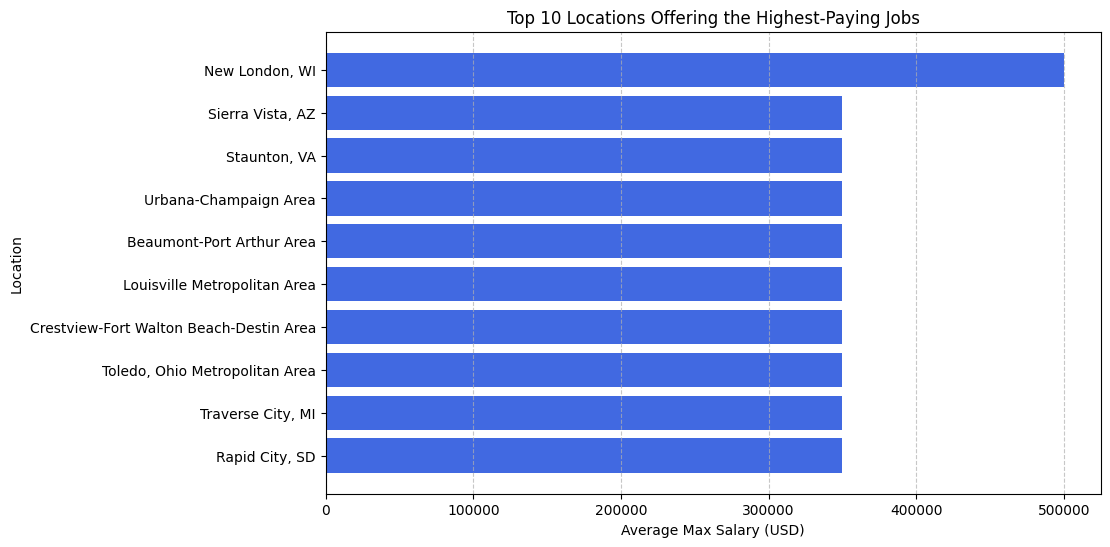

In [5]:
# Group by location and find the average max salary
location_salary = df.groupby("location")["max_salary"].mean().reset_index()

# Sort by max_salary in descending order
highest_paying_locations = location_salary.sort_values(by="max_salary", ascending=False).head(10)

# Plot salary distribution by location
plt.figure(figsize=(10, 6))
plt.barh(highest_paying_locations["location"], highest_paying_locations["max_salary"], color="royalblue")
plt.xlabel("Average Max Salary (USD)")
plt.ylabel("Location")
plt.title("Top 10 Locations Offering the Highest-Paying Jobs")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.show()

# Do remote jobs pay more or less than on-site jobs?

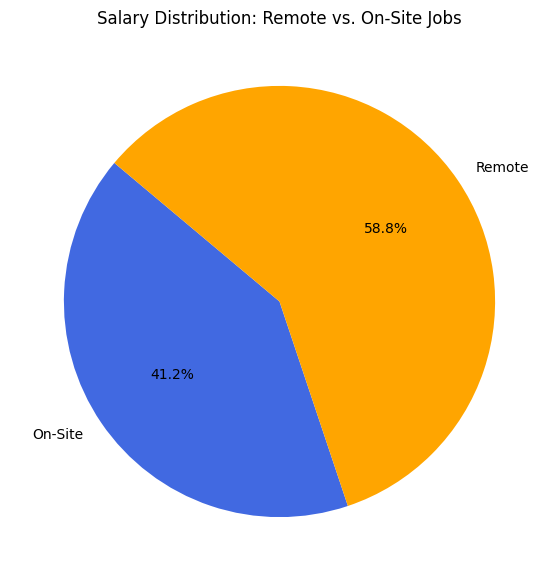

In [4]:
# Categorize jobs into Remote and On-Site
df["job_type"] = df["remote_allowed"].apply(lambda x: "Remote" if x == 1 else "On-Site")

# Compute average median salary for Remote vs. On-Site jobs
salary_comparison = df.groupby("job_type")["med_salary"].mean()

# Plot pie chart
plt.figure(figsize=(7, 7))
colors = ["royalblue", "orange"]
salary_comparison.plot(kind="pie", autopct="%1.1f%%", colors=colors, startangle=140)

plt.ylabel("")  
plt.title("Salary Distribution: Remote vs. On-Site Jobs")


plt.show()

# How do salaries differ across experience levels?

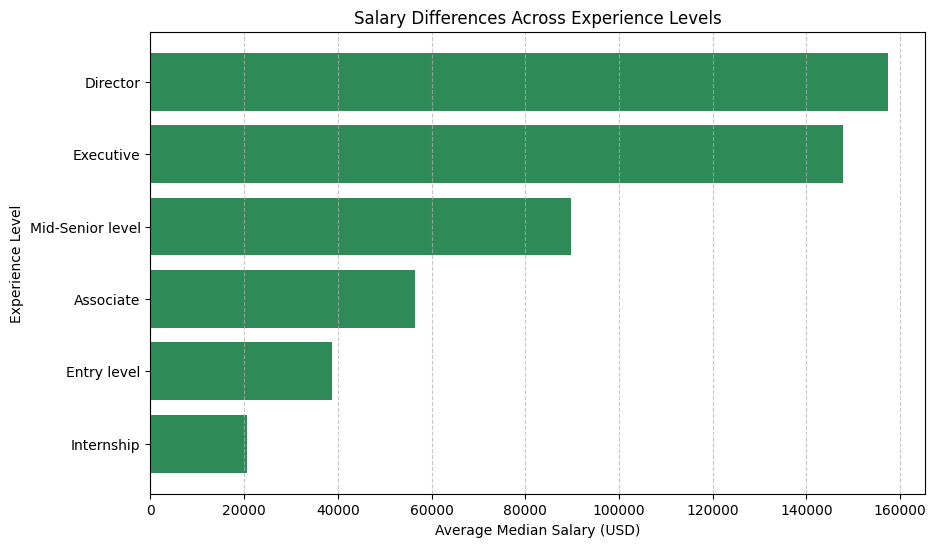

In [3]:
# Group by experience level and calculate the average median salary
experience_salary = df.groupby("formatted_experience_level")["med_salary"].mean().reset_index()

# Sort experience levels for better visualization
experience_salary = experience_salary.sort_values(by="med_salary", ascending=False)

# Plot salary distribution by experience level
plt.figure(figsize=(10, 6))
plt.barh(experience_salary["formatted_experience_level"], experience_salary["med_salary"], color="seagreen")
plt.xlabel("Average Median Salary (USD)")
plt.ylabel("Experience Level")
plt.title("Salary Differences Across Experience Levels")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()